In [1]:
import json
import munch
import numpy as np
import equations as eqn
import PA_plot as pap
import matplotlib.pyplot as plt
from IPython.display import Markdown, Latex, display
import scipy.stats as sts
plt.rc('text', usetex=True)
plt.rcParams.update({
    'font.size': 8,
    'text.usetex': True,
    'text.latex.preamble': r'\usepackage{amsfonts}'
})

config_path = r'/Users/arashfahim/Documents/Corporate-Governance-and-Asset-Pricing/Jupyter_data'

import warnings
warnings.filterwarnings('ignore')



# Parameters

In [2]:
config_dict = {
        "Parameters": {
        "\u03bc:": 1.0,#mu
        "\u03b3:": 0.2,#gamma
        "r:": 0.1, #kappa
        "\u03bb": 0.5,# lambda
        "\u03c3": [ # sigma
        1/(1+i) for i in range(1,2)
        ],
        "\u03c1": [# rho
        i*0.1 for i in range(1,2)
        ]
        },
        "Numerical_settings": {
        "range": 10.0,
        "Number_of_points": 2000,
        "df0": 5,
        "Stop_criterion_for_F_ODE": 0.001,
        "Upper_dy_lim": 1000,
        "Lower_dy_lim": 0.1,
        "num_iterations": 200
        },
        "color": "green"
        }

config_dict1 = {
        "Parameters": {
        "\u03bc:": 1.0,#mu
        "\u03b3:": 0.2,#gamma
        "r:": 0.1, #kappa
        "\u03bb": 0.5,# lambda
        "\u03c3": [ # sigma
        1/(1+i) for i in range(0,2)
        ],
        "\u03c1": [# rho
        i*0.1 for i in range(0,2)
        ]
        },
        "Numerical_settings": {
        "range": 10.0,
        "Number_of_points": 2000,
        "df0": 5,
        "Stop_criterion_for_F_ODE": 0.001,
        "Upper_dy_lim": 1000,
        "Lower_dy_lim": 0.1,
        "num_iterations": 200
        },
        "color": "green"
        }

In [3]:
config = munch.munchify(config_dict)
config1 = munch.munchify(config_dict1)
print('Parameters for scenario 1:\n',config)
print('Parameters for scenario 2:\n',config1)

Parameters for scenario 1:
 Munch({'Parameters': Munch({'μ:': 1.0, 'γ:': 0.2, 'r:': 0.1, 'λ': 0.5, 'σ': [0.5], 'ρ': [0.1]}), 'Numerical_settings': Munch({'range': 10.0, 'Number_of_points': 2000, 'df0': 5, 'Stop_criterion_for_F_ODE': 0.001, 'Upper_dy_lim': 1000, 'Lower_dy_lim': 0.1, 'num_iterations': 200}), 'color': 'green'})
Parameters for scenario 2:
 Munch({'Parameters': Munch({'μ:': 1.0, 'γ:': 0.2, 'r:': 0.1, 'λ': 0.5, 'σ': [1.0, 0.5], 'ρ': [0.0, 0.1]}), 'Numerical_settings': Munch({'range': 10.0, 'Number_of_points': 2000, 'df0': 5, 'Stop_criterion_for_F_ODE': 0.001, 'Upper_dy_lim': 1000, 'Lower_dy_lim': 0.1, 'num_iterations': 200}), 'color': 'green'})


Scenario 1. Dictated monitoring 

$\sigma_0 = 0.5$ and $\rho_1=0.1$


Scenario 2. Optimal monitoring

$\sigma_0 = 1$,$\sigma_1 = 0.\bar{3}$, $\rho_0=0$, and $\rho_1=0.1$.

# Soving the ODEs

In [ ]:
PA_list=[]
PA_tmp = getattr(eqn, "eqn_FfS")(config)
print('[mu, gamma, r ,lmb ,sgm, rho]: ',PA_tmp.param)
PA_tmp.bvp()
print(PA_tmp.message)
PA_list.append(PA_tmp)

PA_tmp1 = getattr(eqn, "eqn_FfS")(config1)
print('[mu, gamma, r ,lmb ,sgm, rho]: ',PA_tmp1.param)
PA_tmp1.bvp()
print(PA_tmp1.message)
PA_list.append(PA_tmp1)

Switching values and active regimes:
 
[mu, gamma, r ,lmb ,sgm, rho]:  [1.0, 0.2, 0.1, 0.5, [0.5], [0.1]]
var =  0.01606        Iteration =  50
var =  0.03457        Iteration =  100
var =  0.08355        Iteration =  150
var =  0.06658        Iteration =  200
var =  0.06658        Iteration =  200
BVP for S is solved in 0.001296 seconds.

BVP for T is solved in 0.000992 seconds.

BVP for C is solved in 0.000947 seconds.


This solves the value function as a function of w, the agent's utility.

If the three numbers below, approximations of payment boundary by three methods,are almost equal, the scheme is working. 
Otherwise, reset df0 in the json file and run the code again.
Calculation of payment boundary by three methods: 
Minimum of abs(F-(mu-gamma*x)/r,  Minimum of abs(dF+1), and Minimum of abs(ddF) are, respectively, at
2.45623, 1.04552, and 1.24062. 
The value of dF(0) is 20.39115. 
If the principal has the bargaining power, the minimum utility of the agent is 0.7954.
The initial

In [ ]:
SOL = PA_list[0]
SOL1 = PA_list[1]

In [41]:
SOL.optimal(SOL.x)

(array([0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5,
        0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5,
        0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5,
        0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5,
        0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5,
        0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5,
        0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5,
        0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5,
        0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5,
        0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5,
        0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5,
        0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5,
        0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5,
        0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5

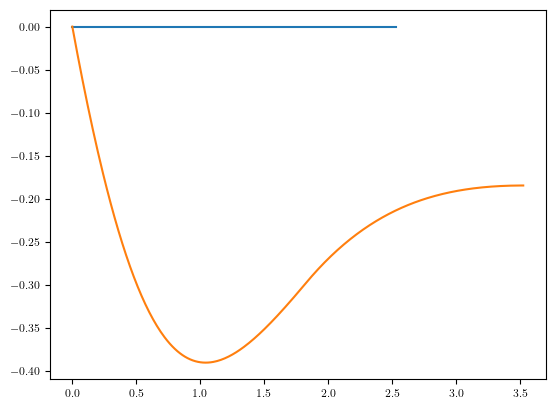

In [38]:
C = np.array(SOL.C)
C1 = np.array(SOL1.C)
plt.plot(SOL.mS,C);
plt.plot(SOL1.mS,C1);
np.savetxt('C_vs_m.dat', np.column_stack((SOL1.mS, C1)), delimiter=',')

The value of the bond as a function of $m$ is $f(m)+m-(1-\lambda)\mathcal{S}(m)+\mathcal{C}(m)$.

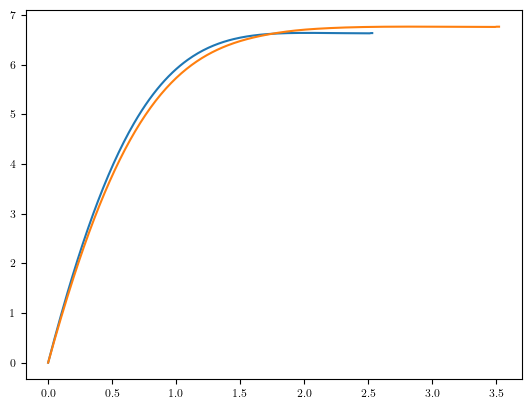

In [39]:
ind = SOL.mS.shape[0]
ind1 = SOL1.mS.shape[0]
plt.plot(SOL.mS,SOL.f[:ind]+SOL.mS-(1-SOL.param[3])*SOL.S + SOL.C)
plt.plot(SOL1.mS,SOL1.f[:ind1]+SOL1.mS-(1-SOL1.param[3])*SOL1.S + SOL1.C);

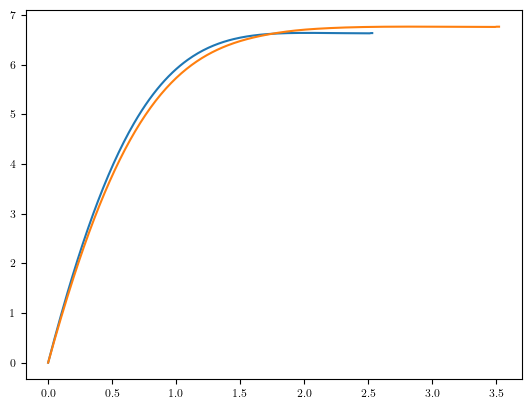

In [40]:
ind = SOL.mS.shape[0]
ind1 = SOL1.mS.shape[0]
plt.plot(SOL.x[:ind]/SOL.param[4][-1],SOL.f[:ind]+SOL.x[:ind]/SOL.param[4][-1]-(1-SOL.param[3])*SOL.S + SOL.C)
plt.plot(SOL1.x[:ind1]/SOL1.param[4][-1],SOL1.f[:ind1]+SOL1.x[:ind1]/SOL1.param[4][-1]-(1-SOL1.param[3])*SOL1.S + SOL1.C);